In [34]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [35]:
X = np.array([0.5, 2.5]) 
Y = np.array([0.2, 0.9])

In [36]:
def sigmoid(x, w, b): 
  y_in = np.dot(w, x) + b 
  y_hat = 1/(1 + np.exp(-y_in)) 
  return y_hat

In [37]:
def error(y, y_hat): 
  err = np.array((y-y_hat)**2).mean() 
  return err 

In [38]:
def delta_w(x, y, y_hat, c): 
  dw = c*(y_hat-y)*y_hat*(1-y_hat)*x
  return dw 

In [39]:
def delta_b(y, y_hat, c): 
  db = c*(y_hat-y)*y_hat*(1-y_hat)
  return db

# **BATCH**

In [40]:
def batch_gd(x, Y, epochs): 
  w = -2 
  b = -2 
  c = 1 
  err_list = [] 
  W = [] 
  B = [] 
  for i in range(epochs): 
    temp_w = 0 
    temp_b = 0
    for x, y in zip(X, Y):
      y_hat = sigmoid(x, w, b) 
      temp_w += delta_w(x, y, y_hat, c) 
      temp_b += delta_b(y, y_hat, c) 
    temp_w = temp_w/len(Y) 
    temp_b = temp_b/len(Y) 
    w -= temp_w 
    b -= temp_b 
    W.append(w) 
    B.append(b) 
    err_list.append(error(Y, sigmoid(X, w, b)))
    print(f"After epoch {i+1}: Weight ==> {w} and Bias ==> {b}") 
  return W, B, err_list 

In [41]:
wt_bgd, b_bgd, err_bgd = batch_gd(X, Y, 100)

After epoch 1: Weight ==> -1.99725384039218 and Bias ==> -1.9961444203923928
After epoch 2: Weight ==> -1.9944912004709476 and Bias ==> -1.9922734714647627
After epoch 3: Weight ==> -1.9917118825485347 and Bias ==> -1.9883870406790147
After epoch 4: Weight ==> -1.9889156852695724 and Bias ==> -1.984485014240972
After epoch 5: Weight ==> -1.9861024035175066 and Bias ==> -1.9805672770781728
After epoch 6: Weight ==> -1.9832718283179627 and Bias ==> -1.9766337128170246
After epoch 7: Weight ==> -1.9804237467389414 and Bias ==> -1.9726842037592907
After epoch 8: Weight ==> -1.9775579417877174 and Bias ==> -1.9687186308578795
After epoch 9: Weight ==> -1.9746741923043087 and Bias ==> -1.9647368736919084
After epoch 10: Weight ==> -1.9717722728513796 and Bias ==> -1.9607388104410104
After epoch 11: Weight ==> -1.9688519536004305 and Bias ==> -1.9567243178588505
After epoch 12: Weight ==> -1.9659130002141245 and Bias ==> -1.9526932712458187
After epoch 13: Weight ==> -1.9629551737245892 and B

In [42]:
epoch = [i for i in range(1, 101)]

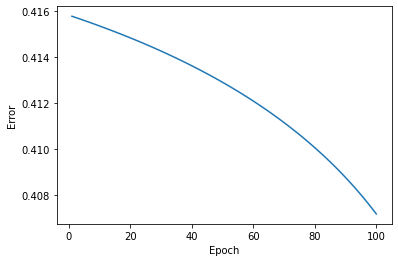

In [43]:
plt.plot(epoch, err_bgd) 
plt.xlabel("Epoch") 
plt.ylabel("Error") 
plt.show()

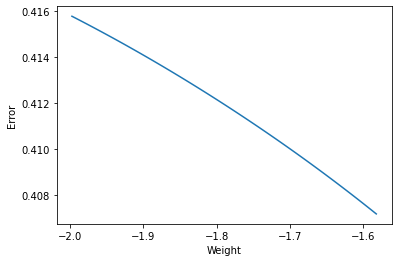

In [44]:
plt.plot(wt_bgd, err_bgd) 
plt.xlabel("Weight") 
plt.ylabel("Error") 
plt.show()

# **MINI-BATCH**

In [45]:
def mini_batch_gd(X, Y, epochs): 
  batch_size = 1 
  w = -2 
  b = -2 
  c = 1 
  err_list = [] 
  W = [] 
  B = [] 
  for i in range(epochs): 
    temp_dw = 0 
    temp_db = 0 
    temp_w = 0 
    temp_b = 0 
    counter = 0
    for x, y in zip(X, Y): 
      y_hat = sigmoid(x, w, b) 
      temp_dw += delta_w(x, y, y_hat, c) 
      temp_db += delta_b(y, y_hat, c) 
      counter += 1 
      if(counter % batch_size == 0):  
        temp_w += temp_dw 
        temp_b += temp_db 
        temp_dw = 0 
        temp_db = 0  
    n_batches = len(Y)/batch_size 
    w -= temp_w/n_batches 
    b -= temp_b/n_batches 
    W.append(w) 
    B.append(b) 
    err_list.append(error(Y, sigmoid(X, w, b)))
    print(f"After epoch {i+1}: Weight ==> {w} and Bias ==> {b}") 
  
  return W, B, err_list

In [46]:
wt_mb, bias_mb, err_mb = mini_batch_gd(X, Y, 100)

After epoch 1: Weight ==> -1.99725384039218 and Bias ==> -1.9961444203923928
After epoch 2: Weight ==> -1.9944912004709476 and Bias ==> -1.9922734714647627
After epoch 3: Weight ==> -1.9917118825485347 and Bias ==> -1.9883870406790147
After epoch 4: Weight ==> -1.9889156852695724 and Bias ==> -1.984485014240972
After epoch 5: Weight ==> -1.9861024035175066 and Bias ==> -1.9805672770781728
After epoch 6: Weight ==> -1.9832718283179627 and Bias ==> -1.9766337128170246
After epoch 7: Weight ==> -1.9804237467389414 and Bias ==> -1.9726842037592907
After epoch 8: Weight ==> -1.9775579417877174 and Bias ==> -1.9687186308578795
After epoch 9: Weight ==> -1.9746741923043087 and Bias ==> -1.9647368736919084
After epoch 10: Weight ==> -1.9717722728513796 and Bias ==> -1.9607388104410104
After epoch 11: Weight ==> -1.9688519536004305 and Bias ==> -1.9567243178588505
After epoch 12: Weight ==> -1.9659130002141245 and Bias ==> -1.9526932712458187
After epoch 13: Weight ==> -1.9629551737245892 and B

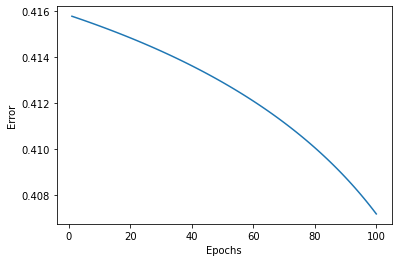

In [47]:
plt.plot(epoch, err_mb) 
plt.xlabel("Epochs") 
plt.ylabel("Error") 
plt.show()

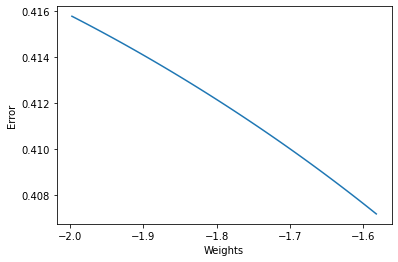

In [48]:
plt.plot(wt_mb, err_mb) 
plt.xlabel("Weights") 
plt.ylabel("Error") 
plt.show()

# **MOMENTUM**

In [49]:
def momentum_gd(X, Y, epochs): 
  w = -2
  b = -2
  eta = 1
  c = 1
  gamma = 0.9
  v_w = 0 
  v_b = 0 
  err_list = [] 
  W = [] 
  B = [] 
  for i in range(epochs): 
    temp_dw = 0
    temp_db = 0 
    for x, y in zip(X, Y):  
      y_hat = sigmoid(x, w, b)
      temp_dw += delta_w(x, y, y_hat, c) 
      temp_db += delta_b(y, y_hat, c) 
    v_w = gamma*v_w + eta*temp_dw 
    v_b = gamma*v_b + eta*temp_db 
    w -= v_w 
    b -= v_b 
    W.append(w) 
    B.append(b) 
    y_hat = sigmoid(X, w, b)
    err_list.append(error(Y, y_hat)) 
    print(f"After epoch {i+1}: Weight is {w} and Bias is {b}") 
  return W, B, err_list

In [50]:
wt_mom, bias_mom, err_mom = momentum_gd(X, Y, 100)

After epoch 1: Weight is -1.99450768078436 and Bias is -1.9922888407847856
After epoch 2: Weight is -1.9840061250335266 and Bias is -1.977576082055321
After epoch 3: Weight is -1.9688673360707378 and Bias is -1.9564434677326807
After epoch 4: Weight is -1.9493633941856943 and Bias is -1.9293606641030028
After epoch 5: Weight is -1.9256734075697135 and Bias is -1.8966979801040313
After epoch 6: Weight is -1.8978865395684548 and Bias is -1.858736566437543
After epoch 7: Weight is -1.8660009795398573 and Bias is -1.8156764531171905
After epoch 8: Weight is -1.8299182601553428 and Bias is -1.7676426602264097
After epoch 9: Weight is -1.7894317045176555 and Bias is -1.7146894808539017
After epoch 10: Weight is -1.7442068520770284 and Bias is -1.6568028511091835
After epoch 11: Weight is -1.6937501830462272 and Bias is -1.5939004203451528
After epoch 12: Weight is -1.637359805935997 and Bias is -1.5258283744380419
After epoch 13: Weight is -1.5740469247910656 and Bias is -1.4523529449551191


In [51]:
epoch = [i for i in range(1, 101)]

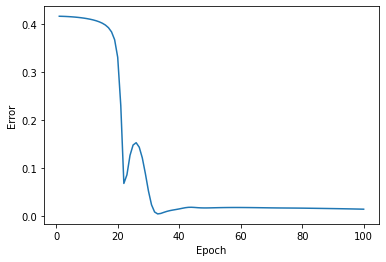

In [52]:
plt.plot(epoch, err_mom) 
plt.xlabel("Epoch") 
plt.ylabel("Error") 
plt.show()

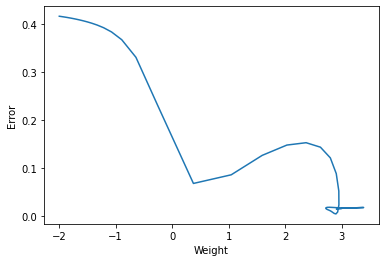

In [53]:
plt.plot(wt_mom, err_mom) 
plt.xlabel("Weight") 
plt.ylabel("Error") 
plt.show()

# **ADAGRAD**

In [54]:
def adagrad_gd(X, Y, epochs): 
  w = -2 
  b = -2 
  c = 1 
  eta = 1 
  eps = 2 
  err_list = [] 
  W = [] 
  B = [] 
  v_w = 0 
  v_b = 0 
  for i in range(epochs): 
    temp_dw = 0 
    temp_db = 0 
    for x, y in zip(X, Y): 
      y_hat = sigmoid(x, w, b)
      temp_dw += delta_w(x, y, y_hat, c) 
      temp_db += delta_b(y, y_hat, c) 

    v_w = v_w + temp_dw**2 
    v_b = v_b + temp_db**2 

    w = w - (eta*temp_dw)/(np.sqrt(v_w + eps)) 
    b = b - (eta*temp_db)/(np.sqrt(v_w + eps)) 

    W.append(w) 
    B.append(b) 
    err_list.append(error(Y, sigmoid(X, w, b))) 
    print(f"After epoch {i+1}: Weight is {w} and Bias is {w}") 
  return W, B, err_list 

In [55]:
wt_adagrad, bias_adagrad, err_adagrad = adagrad_gd(X, Y, 100)

After epoch 1: Weight is -1.9961163731260243 and Bias is -1.9961163731260243
After epoch 2: Weight is -1.9921997690241617 and Bias is -1.9921997690241617
After epoch 3: Weight is -1.988249627035326 and Bias is -1.988249627035326
After epoch 4: Weight is -1.9842653717236984 and Bias is -1.9842653717236984
After epoch 5: Weight is -1.9802464123397214 and Bias is -1.9802464123397214
After epoch 6: Weight is -1.976192142258107 and Bias is -1.976192142258107
After epoch 7: Weight is -1.9721019383894467 and Bias is -1.9721019383894467
After epoch 8: Weight is -1.9679751605639109 and Bias is -1.9679751605639109
After epoch 9: Weight is -1.9638111508854283 and Bias is -1.9638111508854283
After epoch 10: Weight is -1.9596092330546249 and Bias is -1.9596092330546249
After epoch 11: Weight is -1.9553687116586813 and Bias is -1.9553687116586813
After epoch 12: Weight is -1.9510888714261458 and Bias is -1.9510888714261458
After epoch 13: Weight is -1.9467689764445975 and Bias is -1.9467689764445975

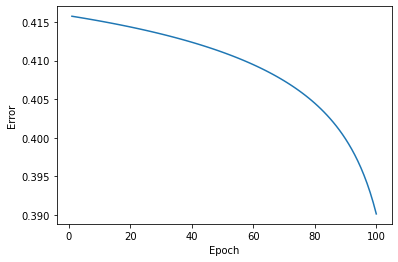

In [56]:
plt.plot(epoch, err_adagrad) 
plt.xlabel("Epoch") 
plt.ylabel("Error") 
plt.show()

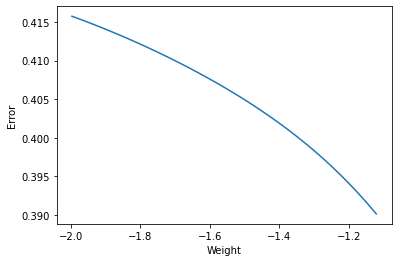

In [57]:
plt.plot(wt_adagrad, err_adagrad) 
plt.xlabel("Weight") 
plt.ylabel("Error") 
plt.show()

# **ADADELTA / RMSPROP**

In [58]:
def adadelta(X, Y, epochs): 
  w = -2 
  b = -2 
  c = 1 
  beta = 0.9
  eta = 1 
  eps = 2  
  vw = 0 
  vb = 0 
  W = [] 
  B = [] 
  err_list = [] 
  for i in range(epochs): 
    temp_dw = 0 
    temp_db = 0 
    for x, y in zip(X, Y): 
      y_hat = sigmoid(x, w, b) 
      temp_dw += delta_w(x, y, y_hat, c) 
      temp_db += delta_b(y, y_hat, c) 
    
    vw = beta*vw + (1-beta)*temp_dw*temp_dw 
    vb = beta*vb + (1-beta)*temp_db*temp_db 

    w = w - (eta*temp_dw)/(np.sqrt(vw) + eps) 
    b = b - (eta*temp_db)/(np.sqrt(vb) + eps) 

    W.append(w) 
    B.append(b) 
    err_list.append(error(Y, sigmoid(X, w, b))) 
    print(f"After epoch {i+1}: Weight is {w} and Bias is {b}") 
  return W, B, err_list 

In [59]:
wt_adadelta, bias_adadelta, err_adadelta = adadelta(X, Y, 100)

After epoch 1: Weight is -1.997256223120722 and Bias is -1.996149115549856
After epoch 2: Weight is -1.9944969137492197 and Bias is -1.9922846915691401
After epoch 3: Weight is -1.991721630266128 and Bias is -1.9884061189900286
After epoch 4: Weight is -1.9889300439145556 and Bias is -1.9845130209655755
After epoch 5: Weight is -1.98612186832929 and Bias is -1.9806051122513006
After epoch 6: Weight is -1.9832968374940776 and Bias is -1.9766821551811036
After epoch 7: Weight is -1.9804546961420402 and Bias is -1.972743940529913
After epoch 8: Weight is -1.9775951947437587 and Bias is -1.9687902775779045
After epoch 9: Weight is -1.9747180865583769 and Bias is -1.9648209883258405
After epoch 10: Weight is -1.9718231257404712 and Bias is -1.960835903842981
After epoch 11: Weight is -1.9689100660390884 and Bias is -1.9568348618169353
After epoch 12: Weight is -1.9659786598524254 and Bias is -1.9528177048299284
After epoch 13: Weight is -1.963028657507652 and Bias is -1.9487842790987544
Aft

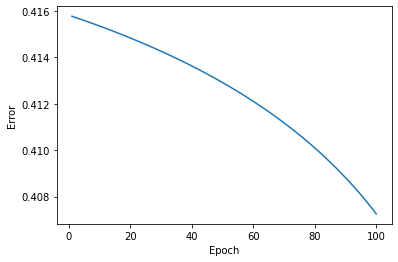

In [60]:
plt.plot(epoch, err_adadelta) 
plt.xlabel("Epoch") 
plt.ylabel("Error") 
plt.show()

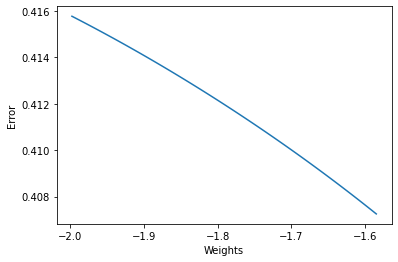

In [61]:
plt.plot(wt_adadelta, err_adadelta) 
plt.xlabel("Weights") 
plt.ylabel("Error") 
plt.show()

# **NAG**

In [62]:
def nag_gd(X, Y, epochs): 
  w = -2 
  b = -2 
  c = 1 
  eta = 1 
  beta = 0.9 
  W = [] 
  B = [] 
  err_list = [] 
  prev_vw = 0 
  prev_vb = 0 
  for i in range(epochs): 
    temp_dw = 0
    temp_db = 0 
    vw = w - beta*prev_vw  
    vb = b - beta*prev_vb 
    for x, y in zip(X, Y): 
      y_hat = sigmoid(x, vw, vb) 
      temp_dw += delta_w(x, y, y_hat, c) 
      temp_db += delta_b(y, y_hat, c) 
    v_w = beta*prev_vw + eta*temp_dw 
    v_b = beta*prev_vb + eta*temp_db 

    w = w - v_w 
    b = b - v_b 
    prev_vw = vw 
    prev_vb = vb 
    W.append(w) 
    B.append(b) 
    err_list.append(error(Y, sigmoid(X, w, b)))
    print(f"After epoch {i+1}: Weight is {w} and Bias is {b}") 
  return W, B, err_list

In [63]:
wt_nag, bias_nag, err_nag = nag_gd(X, Y, 100)

After epoch 1: Weight is -1.99450768078436 and Bias is -1.9922888407847856
After epoch 2: Weight is 0.09208752969883705 and Bias is -0.12233092205684715
After epoch 3: Weight is 0.3496820549726968 and Bias is 0.015139237804713934
After epoch 4: Weight is 0.28018745529876277 and Bias is -0.023339239295008182
After epoch 5: Weight is 0.31190519273741324 and Bias is -0.00845939406294332
After epoch 6: Weight is 0.2973070318717679 and Bias is -0.015577862980060121
After epoch 7: Weight is 0.30410477691289906 and Bias is -0.012309312554174496
After epoch 8: Weight is 0.3009367297700881 and Bias is -0.01384051547967325
After epoch 9: Weight is 0.30241384383376124 and Bias is -0.01312827006823844
After epoch 10: Weight is 0.3017250985067943 and Bias is -0.013460725734418671
After epoch 11: Weight is 0.30204625170762817 and Bias is -0.013305782477370723
After epoch 12: Weight is 0.301896501760589 and Bias is -0.013378047234044135
After epoch 13: Weight is 0.3019663284864341 and Bias is -0.0133

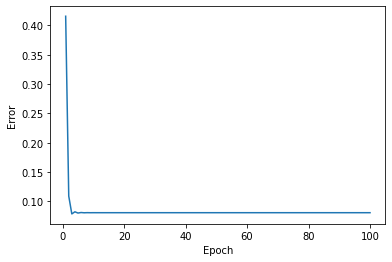

In [64]:
plt.plot(epoch, err_nag) 
plt.xlabel("Epoch") 
plt.ylabel("Error") 
plt.show()

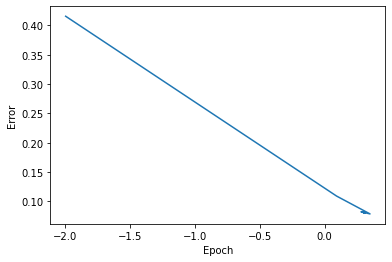

In [65]:
plt.plot(wt_nag, err_nag) 
plt.xlabel("Epoch") 
plt.ylabel("Error") 
plt.show()

# **ADAM**

In [66]:
def adam_gd(X, Y, epochs): 
  w, b, c = -2, -2, 1 
  beta1, beta2 = 0.45, 0.85
  eta = 1 
  mt_w, mt_b = 0, 0 
  vt_w, vt_b = 0, 0
  eps = 2 
  err_list = [] 
  W = [] 
  B = [] 
  for i in range(1, epochs+1): 
    temp_dw = 0 
    temp_db = 0 
    for x, y in zip(X, Y): 
      y_hat = sigmoid(x, w, b)
      temp_dw += delta_w(x, y, y_hat, c) 
      temp_db += delta_b(y, y_hat, c) 
    
    mt_w = beta1*mt_w + eta*temp_dw
    mt_b = beta1*mt_b + eta*temp_db 

    vt_w = beta2*vt_w + (1-beta2)*temp_dw*temp_dw
    vt_b = beta2*vt_b + (1-beta2)*temp_db*temp_db 

    mt_hat_w = mt_w/(1-beta1**i) 
    vt_hat_w = vt_w/(1-beta2**i) 
    w = w - (eta*mt_hat_w)/(np.sqrt(vt_hat_w) + eps)

    mt_hat_b = mt_b/(1-beta1**i) 
    vt_hat_b = vt_b/(1-beta2**i) 
    b = b - (eta*mt_hat_b)/(np.sqrt(vt_hat_b) + eps)

    W.append(w) 
    B.append(b) 

    err_list.append(error(Y, sigmoid(X, w, b)))
    print(f"After epoch {i+1}: Weight is {w} and Bias is {b}") 
  return W, B, err_list

In [67]:
wt_adam, bias_adam, err_adam = adam_gd(X, Y, 100)

After epoch 2: Weight is -1.995020656602947 and Bias is -1.9930167796209848
After epoch 3: Weight is -1.990003942379954 and Bias is -1.9859988430558184
After epoch 4: Weight is -1.984943630600177 and Bias is -1.9789406583595177
After epoch 5: Weight is -1.979834690635686 and Bias is -1.971837888123295
After epoch 6: Weight is -1.9746732542084358 and Bias is -1.9646873418112303
After epoch 7: Weight is -1.9694563772812923 and Bias is -1.9574867391095685
After epoch 8: Weight is -1.9641817526175487 and Bias is -1.950234431939408
After epoch 9: Weight is -1.9588474636550728 and Bias is -1.9429291696501176
After epoch 10: Weight is -1.9534518074154015 and Bias is -1.9355699319427646
After epoch 11: Weight is -1.9479931798422279 and Bias is -1.9281558220225905
After epoch 12: Weight is -1.942470006297806 and Bias is -1.9206860029370483
After epoch 13: Weight is -1.9368807009509286 and Bias is -1.9131596613968054
After epoch 14: Weight is -1.9312236432504943 and Bias is -1.905575987809564
Af

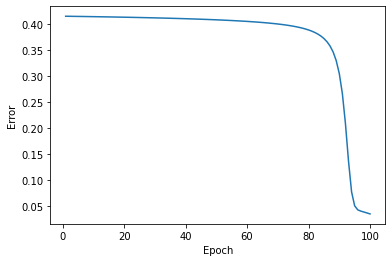

In [68]:
plt.plot(epoch, err_adam) 
plt.xlabel("Epoch") 
plt.ylabel("Error") 
plt.show()

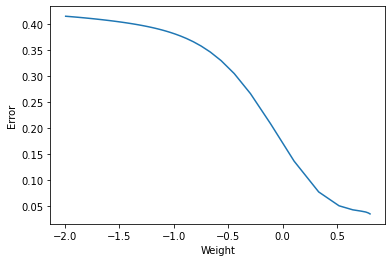

In [69]:
plt.plot(wt_adam, err_adam) 
plt.xlabel("Weight") 
plt.ylabel("Error") 
plt.show()

# **ANALYSIS OF ALL GRADIENTS**

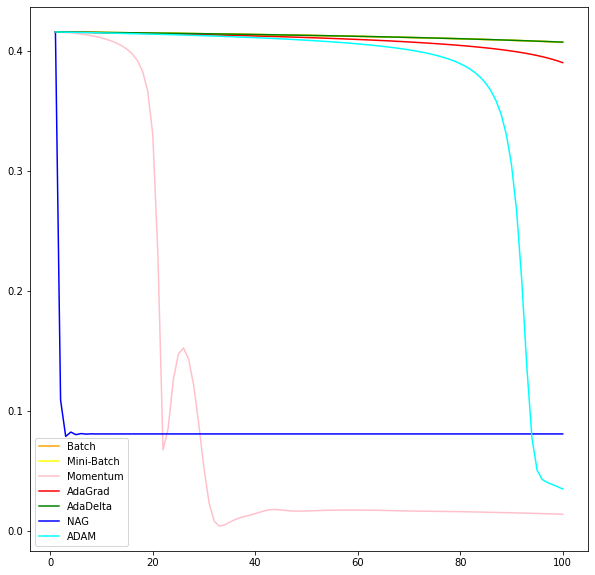

In [70]:
plt.figure(figsize=(10, 10)) 
plt.plot(epoch, err_bgd, color='orange') 
plt.plot(epoch, err_mb, color='yellow')
plt.plot(epoch, err_mom, color='pink') 
plt.plot(epoch, err_adagrad, color='red')
plt.plot(epoch, err_adadelta, color='green') 
plt.plot(epoch, err_nag, color='blue')
plt.plot(epoch, err_adam, color='cyan') 
plt.legend(['Batch', 'Mini-Batch', 'Momentum', 'AdaGrad', 'AdaDelta', 'NAG', 'ADAM'], loc='best') 
plt.show()